# EMNIST using linear + softmax classfier
The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset. Further information on the dataset contents and conversion process can be found in the paper available at https://arxiv.org/abs/1702.05373v1.

Dataset is available at https://www.kaggle.com/crawford/emnist

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## reading
read data from csv file

In [2]:
train_data_filename = 'EMNIST_data/emnist-balanced-train.csv'
test_data_filename = 'EMNIST_data/emnist-balanced-test.csv'
raw_train_data = pd.read_csv(train_data_filename, header=None).values
raw_test_data = pd.read_csv(test_data_filename, header=None).values

read mapping file

In [3]:
mapping_filename = 'EMNIST_data/emnist-balanced-mapping.txt'
mapper = {}
with open(mapping_filename) as f:
    m = map(str.split, f.readlines())
    for item in m:
        mapper.update({int(item[0]): chr(int(item[1]))})
print(mapper)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


## loading
load data into numpy

In [4]:
classes = 47
eye = np.eye(classes)
train_images, train_labels = raw_train_data[:, 1:].astype(np.float32), eye[raw_train_data[:, :1].ravel()]
test_images, test_labels = raw_test_data[:, 1:].astype(np.float32), eye[raw_test_data[:, :1].ravel()]
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(112800, 784)
(112800, 47)
(18800, 784)
(18800, 47)


## data visiualization

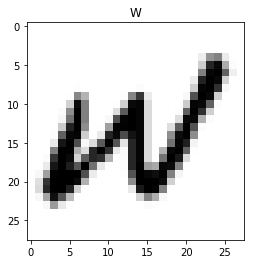

In [5]:
index = 69
img = train_images[index].reshape(28,28).T
plt.imshow(img,cmap='binary')
plt.title(mapper[np.argmax(train_labels[index])])
plt.show()

data normalization

In [6]:
train_images/=255.0
test_images/=255.0

## modeling
create a simple linear model classifier

In [7]:
x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784,classes]))
b = tf.Variable(tf.zeros([classes]))
y = tf.matmul(x, W) + b
y_hat = tf.nn.softmax(y)

<font color='red'>To ensure numeric stability, standard cross entropy formula should not be used.</font>

see also https://stackoverflow.com/questions/33712178/tensorflow-nan-bug

In [8]:
y_ = tf.placeholder("float", [None,classes])
# cross_entropy = -tf.reduce_sum(y_*tf.log(y))
cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

## training
using batch gradient decsent to train the model with 10000 iterations

0 171316.6347579956
1 134245.81072235107
2 129449.40014648438
3 127113.86219787598
4 125540.99350738525
5 124470.43013000488
6 123498.94931030273
7 122844.59498596191
8 122272.52389526367
9 121655.84799957275
10 121196.44706726074
11 120666.26651000977
12 120293.44947814941
13 119945.76943206787
14 119569.78659820557
15 119286.61877441406
16 118878.19487380981
17 118711.91751861572
18 118431.82033920288
19 118122.43041992188


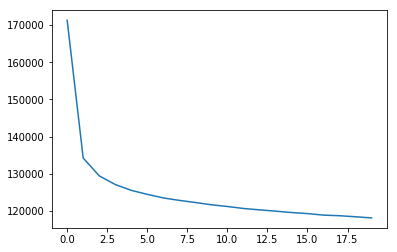

In [9]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size = 100
costs = []
for epoch in range(20):
    cost = 0
    p = np.arange(train_images.shape[0])
    np.random.shuffle(p)
    batch_length = np.ceil(train_images.shape[0] / batch_size).astype(int)
    for i in range(batch_length):
        d1 = i * batch_size
        d2 = min(d1 + batch_size, train_images.shape[0])
        d = sess.run([train_step, cross_entropy], feed_dict={
            x: train_images[p[d1 : d2]], 
            y_: train_labels[p[d1 : d2]]
        })
        cost += d[1]
    print(epoch, cost)
    costs.append(cost)
plt.plot(costs)

## evaluating

In [10]:
print('weight:', b.eval())
correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('training set accuracy:', sess.run(accuracy, feed_dict={x: train_images, y_: train_labels}))
print('test set accuracy:', sess.run(accuracy, feed_dict={x: test_images, y_: test_labels}))

weight: [-0.46823117  1.5946718  -0.07899931 -1.0058458   0.4336559   0.9114075
 -1.4680985   0.61314565 -2.0606782  -0.5373708  -0.81446517 -2.321797
  0.83973444 -0.5410389  -1.5806626   0.7318555  -1.0185012  -0.2890913
  1.2369368   3.0811586  -0.03354501  3.3605351  -1.089404    0.01545058
 -0.7086396  -0.22480069 -1.5614055  -1.6645938   0.09509527  1.5895673
  0.01209708  1.0405462  -1.4532982  -1.0443708   1.9503369  -0.4840173
 -0.773554   -0.3285948  -0.32620275 -1.275383    0.11893479 -1.0924212
  1.8573332   0.6014319  -1.3103919   1.0699407   2.140586  ]
training set accuracy: 0.719734
test set accuracy: 0.6934574


## result visiualization

Model predicts N


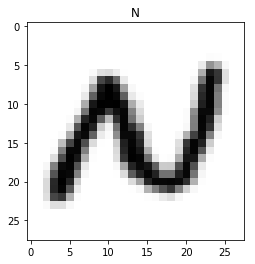

In [11]:
index = 8140
img = test_images[index].reshape(28,28).T
plt.imshow(img,cmap='binary')
plt.title(mapper[np.argmax(test_labels[index])])
prediction = tf.argmax(y, 1)
print('Model predicts', mapper[prediction.eval(feed_dict={x: test_images[index].reshape(1,784)})[0]])